Импортируем необходимые библиотеки, и делаем некоторые предустановки.

In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from IPython.display import Javascript
from itertools import combinations
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

## Общий обзор
Читаем файл, выводим датасет.

In [2]:
df = pd.read_csv('stud_math.csv')
df.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


У нас в распоряжении данные о 395 учениках. С первого взгляда видим, что некоторые поля содержат пустые значения.
И кажется еще кое-что.
Посмотрим информацию о колонках.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Приведем все названия колонок в нижний регистр.

In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Наблюдается два интересных момента.
1. Колонок в нашем датасете 30, в то время как в описании датасета - 29. Видим отсутствующую в описании колонку "studytime, granular", в которой 388 ненулевых значений, так же как и в колонке "studytime". Совпадают ли данные в этих колонках? Выясним позже а пока возьмем на заметку.
2. Не все колонки числового типа отражают абсолютный колчиственный показатель. Например, такие колонки как Medu, Fedu - упрощенное представление об уровне образования.

## Рассмотрим все столбцы

Составим словарь допустимых значений для "номинативных" столбцов. Он понадобится нам для отображения информации на графиках.

"Номинативных" написано в кавычках, потому что, как упомяналось ранее, некторые числовые столбцы не отражают количественный показатель, и такие столбцы в принципе можно считать номинативными

In [6]:
rules = {
    "sex": {
        "title": "пол",
        "values": {
          "F": 'девушки',
          "M": "юноши"   
        }
    },
    "address": {
        "title": "адрес",
        "values": {
          "U": "город",
          "R": "за городом"   
        }
    },
    "famsize": {
        "title": "размер семьи",
        "values": {
          "LE3": "<= 3",
          "GT3": "> 3"
        }
    },
    "pstatus": {
        "title": "родители вместе?",
        "values": {
          "T": "вместе",
          "A": "раздельно"
        }
    },
    "medu": {
        "title": "образование матери",
        "values": {
          "0.0": "0) нет",
          "1.0": "1) 4 кл",
          "2.0": "2) 5-9 кл",
          "3.0": "3) 11 кл / ср.сп.",
          "4.0": "4) высшее",
        }
    },
    "fedu": {
        "title": "образование отца",
        "values": {
          "0.0": "0) нет",
          "1.0": "1) 4 кл",
          "2.0": "2) 5-9 кл",
          "3.0": "3) 11 кл / ср.сп.",
          "4.0": "4) высшее",
        }
    },
    "fjob": {
        "title": "работа отца",
        "values": {
          "teacher": "учитель",
          "health": "здравохранение",
          "services": "гос.служба",
          "at_home": "не работает",
          "other": ".другое",
        }
    },
    "mjob": {
        "title": "работа матери",
        "values": {
          "teacher": "учитель",
          "health": "здравохранение",
          "services": "гос.служба",
          "at_home": "не работает",
          "other": ".другое",
        }
    },
    "reason": {
        "title": "причина выбора школы",
        "values": {
          "home": "близость к дому",
          "reputation": "репутация",
          "course": "об. программа",
          "other": ".другое",
        }
    },
    "guardian": {
        "title": "опекун",
        "values": {
          "mother": "мать",
          "father": "отец",
          "other": "другое",
        }
    },
    "traveltime": {
        "title": "время до школы (мин)",
        "values": {
          "1.0": "1) < 15",
          "2.0": "2) 15-30",
          "3.0": "3) 30-60",
          "4.0": "4) > 60",
        }
    },
    "studytime": {
        "title": "время учебы вне школы (ч)",
        "values": {
          "1.0": "1) < 2",
          "2.0": "2) 2-5",
          "3.0": "3) 5-10",
          "4.0": "4) > 10",
        }
    },
    "studytime, granular": {
        "title": "время учебы вне школы (ч) g",
        "values": {
          "1.0": "1) < 2",
          "2.0": "2) 2-5",
          "3.0": "3) 5-10",
          "4.0": "4) > 10",
        }
    },
    "failures": {
        "title": "внеучебные неудачи",
        "values": {
          "1.0": "1",
          "2.0": "2",
          "3.0": "3",
          "0.0": "другое",}
    },
    "schoolsup": {
        "title": "доп. обр. поддержка",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "famsup": {
        "title": "семейная обр. поддержка",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "paid": {
        "title": "доп. платная математика",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "activities": {
        "title": "доп. внеучебные занятия",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "nursery": {
        "title": "дет. сад",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "higher": {
        "title": "вышку хочет?",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "internet": {
        "title": "интернет есть?",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "romantic": {
        "title": "отношения",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "famrel": {
        "title": "семейные отношения",
        "values": {
          "1.0": "1) ужасные",
          "2.0": "2) плохие",
          "3.0": "3) норм",
          "4.0": "4) хорошие",
          "5.0": "5) прекрасные",
        }
    },
    "freetime": {
        "title": "свобода",
        "values": {
          "1.0": "1) оч мало",
          "2.0": "2) мало",
          "3.0": "3) норм",
          "4.0": "4) много",
          "5.0": "5) оч много",
        }
    },
    "goout": {
        "title": "время с друзьями",
        "values": {
          "1.0": "1) оч мало",
          "2.0": "2) мало",
          "3.0": "3) норм",
          "4.0": "4) много",
          "5.0": "5) оч много",
        }
    },
    "health": {
        "title": "здоровье",
        "values": {
          "1.0": "1) ужасное",
          "2.0": "2) плохое",
          "3.0": "3) норм",
          "4.0": "4) хорошее",
          "5.0": "5) прекрасное",
        }
    }
}

Заменим значения в "номинативных" столбцах, чтобы лучше понимать диаграммы.Также заменим пустые значения, чтобы отобразить их на диаграммах. Возьмем -2 вкачестве пустого значение для числовых столбцов.

In [7]:
def change_column_type(name, type):
  if name in list(rules.keys()):
    if type in ['float64', 'int64']:
      df[name] = df[name].astype(str)

def smart_value(name, value):
  if name in list(rules.keys()):
    if value in list(rules[name]['values'].keys()):
      return rules[name]['values'][value]
  return value
  
def empty_value(type, value):
  if type == 'object':
    return '-'
  elif type in ['float64', 'int64']:
    return -2

def change_value(name, type, value):
  if value != value or value == 'nan':
    return empty_value(type, value)
  else:
    return smart_value(name, value)


for column_name in df:
  change_column_type(column_name, df[column_name].dtype)
  df[column_name] = df[column_name].map(
      lambda value: change_value(column_name, df[column_name].dtype, value)
  )

Поскольку в датасете не много данных, и даже в числовых столбцах кол-во уникальных значений не сильно велико, то можно построить для всех столцов столбчатые диаграммы и посмотреть на распределение по признакам.

<ipython-input-8-f83e0a35c0fe>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


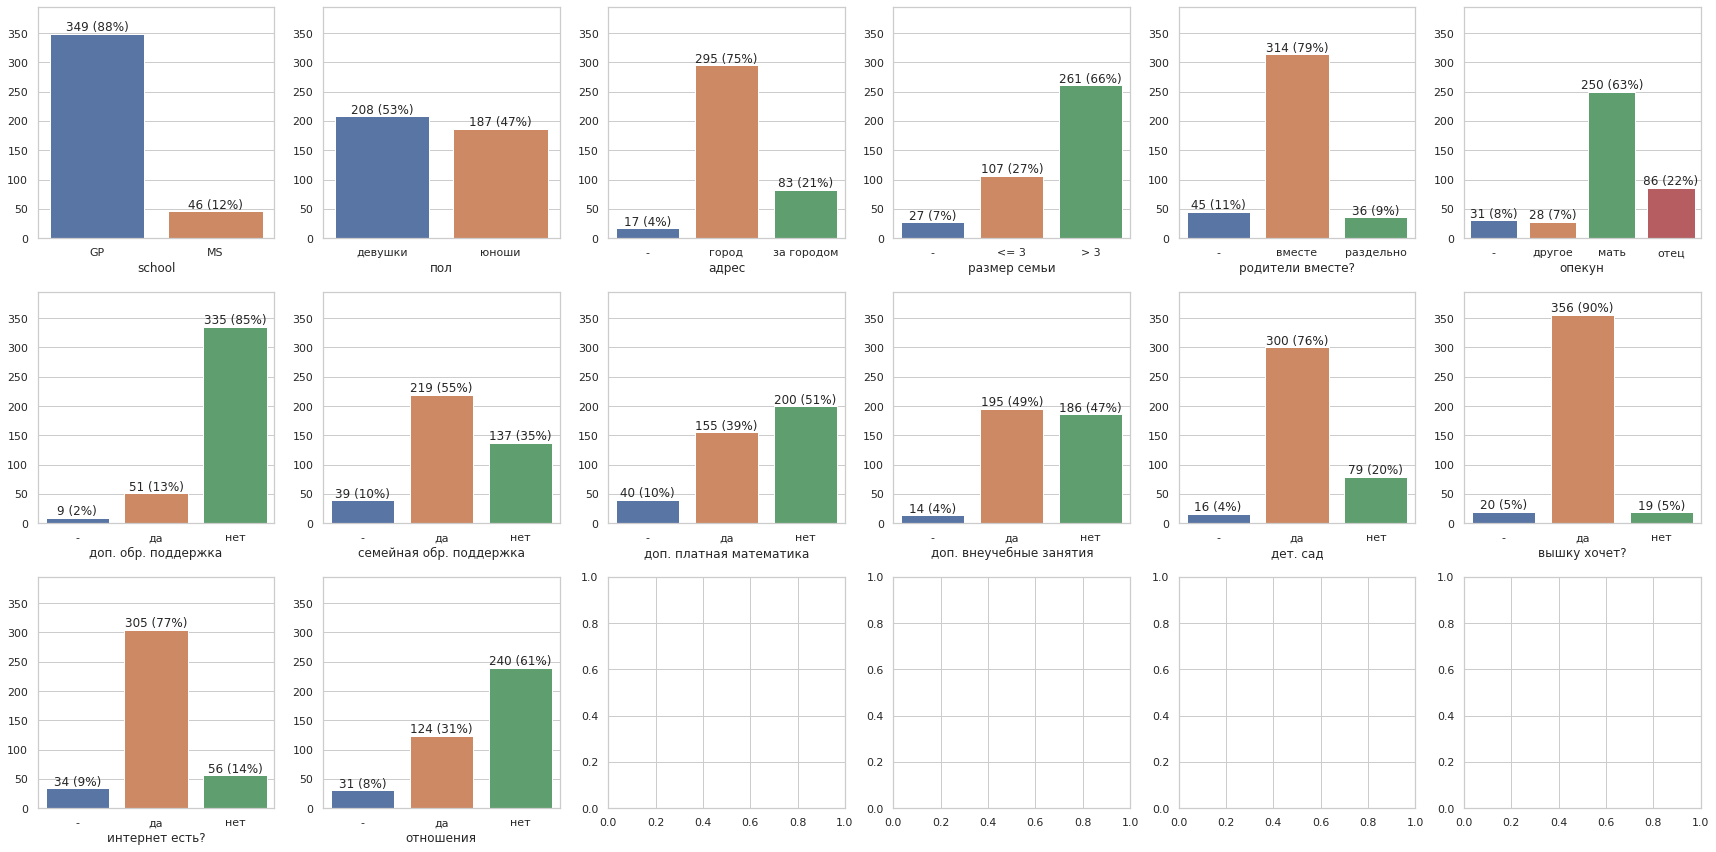

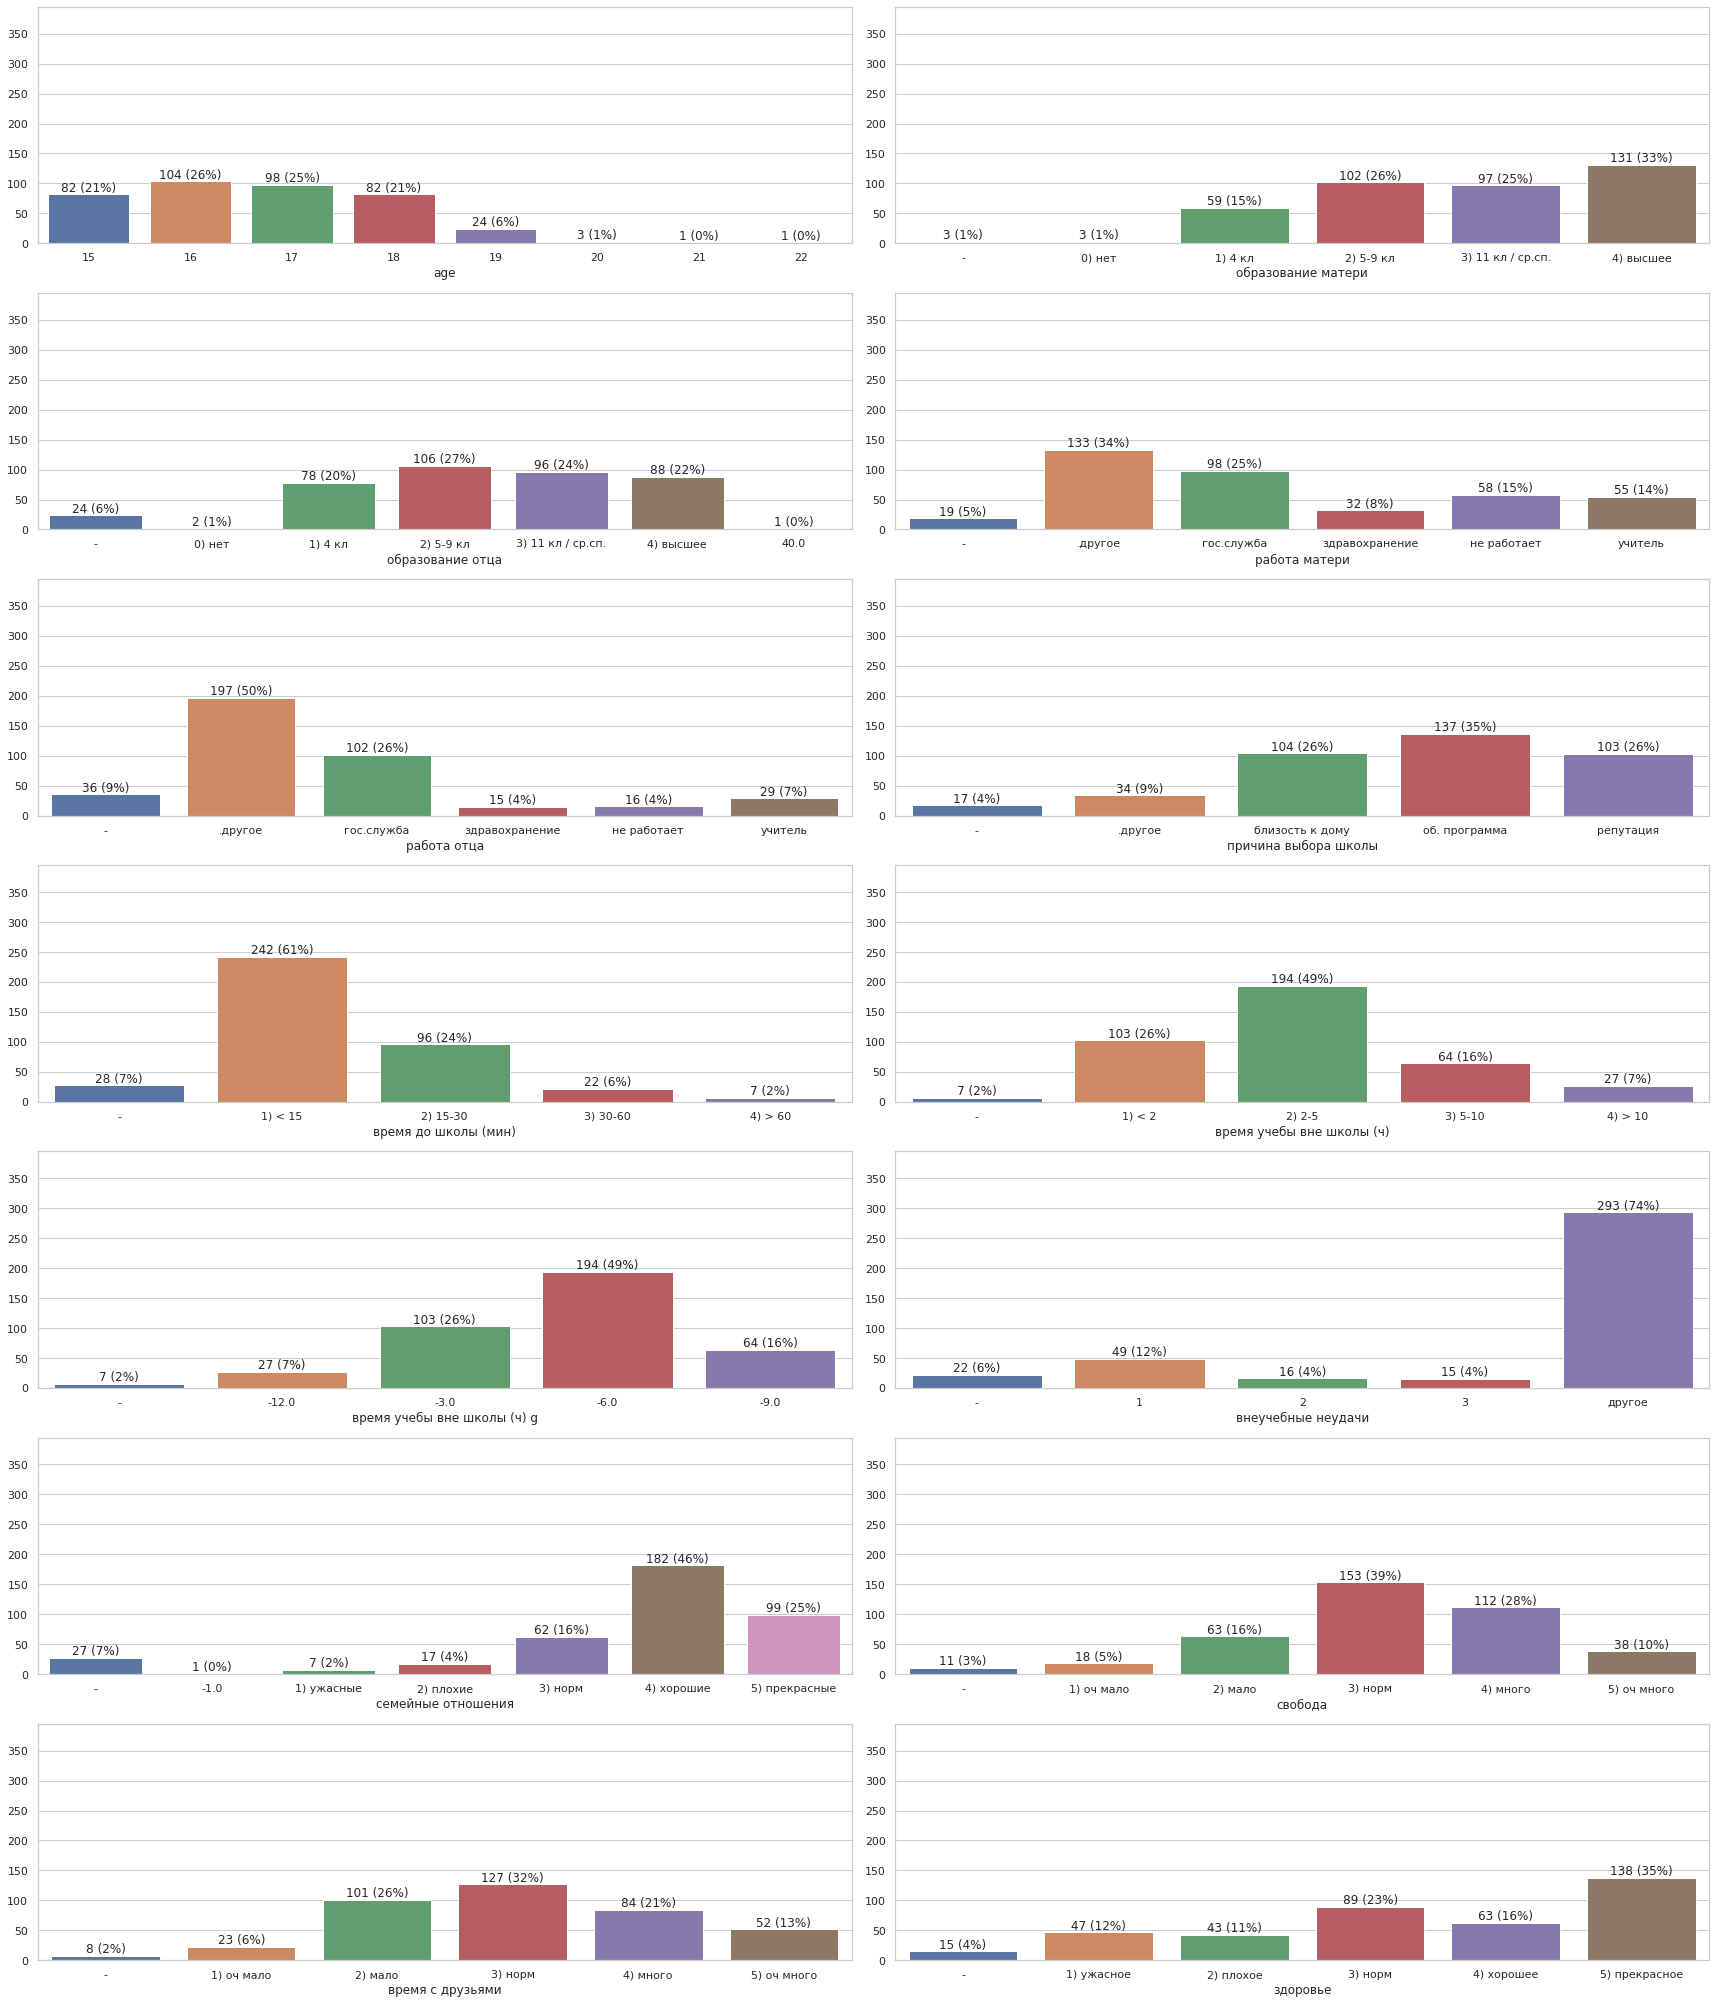

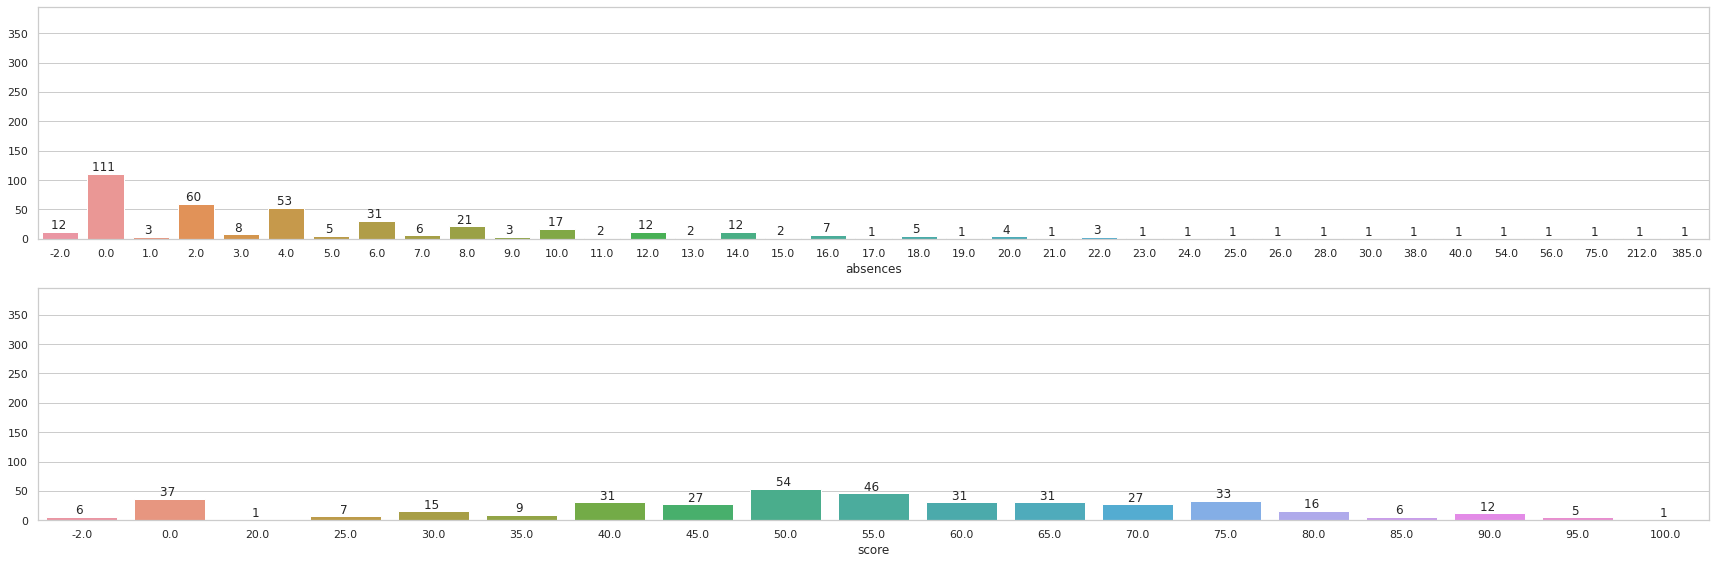

In [8]:
def explore(df, columns, inrow = 4, percent = True):
  fig, axes = plt.subplots(
    math.ceil(len(columns)/inrow), 
    inrow, 
    figsize=(24, math.ceil(len(columns)/inrow) * 4)
  )

  for column in columns:
    if len(columns) > len(columns) / inrow:
      ax = axes[
        int(math.floor(columns.index(column) + 1) / inrow - 0.00000001),
        int(columns.index(column) % inrow)
      ]
    else:
      ax = axes[int(math.floor(columns.index(column) + 1) / inrow - 0.00000001)]

    df.sort_values(by = [column], inplace = True)
    countplot = sns.countplot(data = df, x = column, ax = ax)
  
    countplot.set(
      ylim=(0, len(df)),
      xlabel = rules[column]['title'] if column in list(rules.keys()) else column, 
      ylabel=''
    )
  
    for p in countplot.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        countplot.annotate(
            f'{int(y)} {f"({int(round(100*y/len(df), 0))}%)" if percent else ""}', 
            (x.mean(), y), 
            ha ='center', 
            va='bottom'
        )
  
  fig.tight_layout() 
  fig.show()

explore(df, ['school', 'sex', 'address', 'famsize', 'pstatus', 
  'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
  'higher', 'internet', 'romantic'], 6)

explore(df, ['age', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 
  'traveltime', 'studytime', "studytime, granular", 'failures', 'famrel', 'freetime', 
  'goout', 'health'], 2)

explore(df, ['absences', 'score'], 1, percent = False)

Стобчатые диаграммы наглядно показывают нам распределение учеников по признакам и по количественным показателям. Например мы видим что в нашей выборке больше информации об учениках школы GP, что большинство учеников живут в городе, большинство хотят получить высшее образование, девушек и юношей примерно одинаково. Детально описывать каждый столбец не имеет смысла. Мы видим, что во многих столбцах есть пустые значения. Видим потенциальные выбросы в столбцах "возраст", "образование матери", "образование отца", "семейные отношения". Совсем непонятный столбец "количество внеучебных неудач", мало того непонятно, что он означает, так и не понятно значение 0 - это меньше 1 или больше 3. 

Видим что распределение значений в столбце studytime, granular такое же как и в столбце studytime, но при этом сами значения отличаются. Будем считать что между ними есть однозначное соответствие и не будем рассматривать этот столбец отдельно. И даже удалим его чтобы не мешался.

Есть несколько интересных моментов. 

Значение 40 в столбце "образования отца". Скорее всего это опечатка и там должно быть 4. Заменим.

Значение -1 в столбце "семейные отношения". Скоре всего это опечатка и там должно быть 1. Заменим.

Столбец "пропущенные занятия" выглядит интересно: четных чисел  гораздо больше, чем нечетных, вероятно занятия проходят парами. Один ученик пропустил 385 занятий, вероятно он не посещал занятия вообще никогда.

In [9]:
del df["studytime, granular"]


In [10]:
df['fedu'][df['fedu'] == '40.0'] = rules['fedu']['values']['4.0']

<ipython-input-10-9b77c7deb37e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fedu'][df['fedu'] == '40.0'] = rules['fedu']['values']['4.0']


In [11]:
df['famrel'][df['famrel'] == '-1.0'] = rules['famrel']['values']['1.0']

<ipython-input-11-3a88d26d6118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['famrel'][df['famrel'] == '-1.0'] = rules['famrel']['values']['1.0']


## Выбросы

Давайте найдем выбросы в числовых столбцах пользуясь формулой интерквартильного расстояния.

In [12]:
def show_outliners():
  for column_name in df:
    column = df[column_name]
    if column.dtype in ['int64', 'float64']:
      IQR = column.quantile(0.75) - column.quantile(0.25)
      outliners = {
        "left": column.quantile(0.25) - 1.5 * IQR, 
        "right": column.quantile(0.75) + 1.5 * IQR
      }
      print(column_name, outliners)

    
show_outliners()

age {'left': 13.0, 'right': 21.0}
absences {'left': -12.0, 'right': 20.0}
score {'left': -5.0, 'right': 115.0}


Подобный подход предлагает считать выбросами возраста старше 21. Думаю, сюда же можно включить и 20. Слишком уж мало учеников с таким возрастом, чтобы полагаться на эти значения.

Со значениями выбросов для пропусков пожалуй согласимся.

Выбросов в oценках как видим нет.

Объединим все все возроста от 20 лет в один и будет считать что это 20 лет и страше.

Удалим в столбце пропуски значение более 200 а значение более 20 объединим в одно и будем считать что это 20 и более.

In [13]:
df['age'][df['age'] >= 20] = 20

<ipython-input-13-029c1b81b9ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][df['age'] >= 20] = 20


In [14]:
df["absences"][df["absences"] > 200] = -2

<ipython-input-14-e4555da28a70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["absences"][df["absences"] > 200] = -2


In [15]:
df["absences"][df["absences"] > 20] = 20

<ipython-input-15-9b2329dbe053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["absences"][df["absences"] > 20] = 20


# Корреляция

Посмотрим корреляцию числовых значений на графиках.

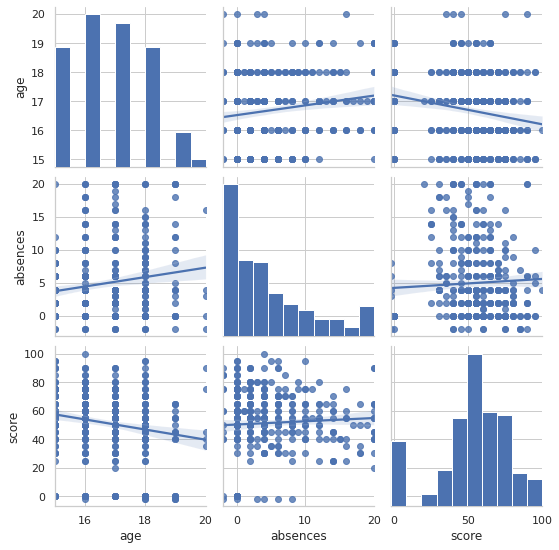

In [16]:
sns.pairplot(df, kind = 'reg')

Видим корреляцию с возрастом. Так же наблюдаем небольшую и странную корреляцию с пропусками занятий. Получается, те, кто пропускал больше, сдают экзамен лучше. Почему так? Заметим что среди оценок есть 0. Вероятно это те ученики, кто не пришел на экзамен. Удалим такие записи из нашего датафрейма, поскольку это не правильно учитывать их в анализе результатов экзамена.

In [17]:
df = df[df['score'] > 0]

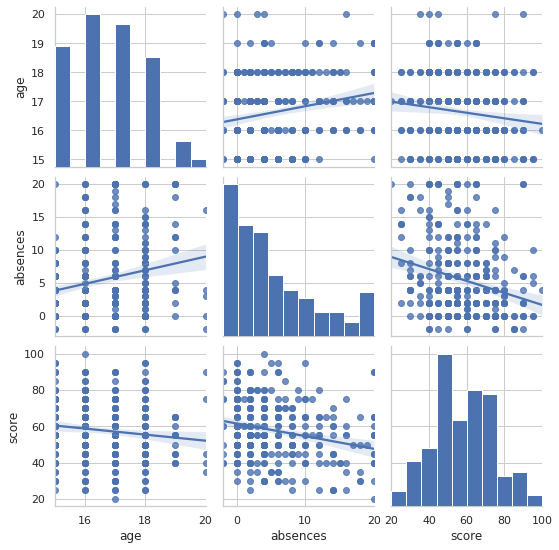

In [18]:
sns.pairplot(df, kind = 'reg')

Теперь все логично, чем больше пропусков, тем ниже итоговая оценка.

Признаем столбцы возраст и пропуски влияющими на итоговую оценку и оставляем их для дальнейшего построения модели.

#Анализ номинативных переменных

<ipython-input-19-18c6e011aadb>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


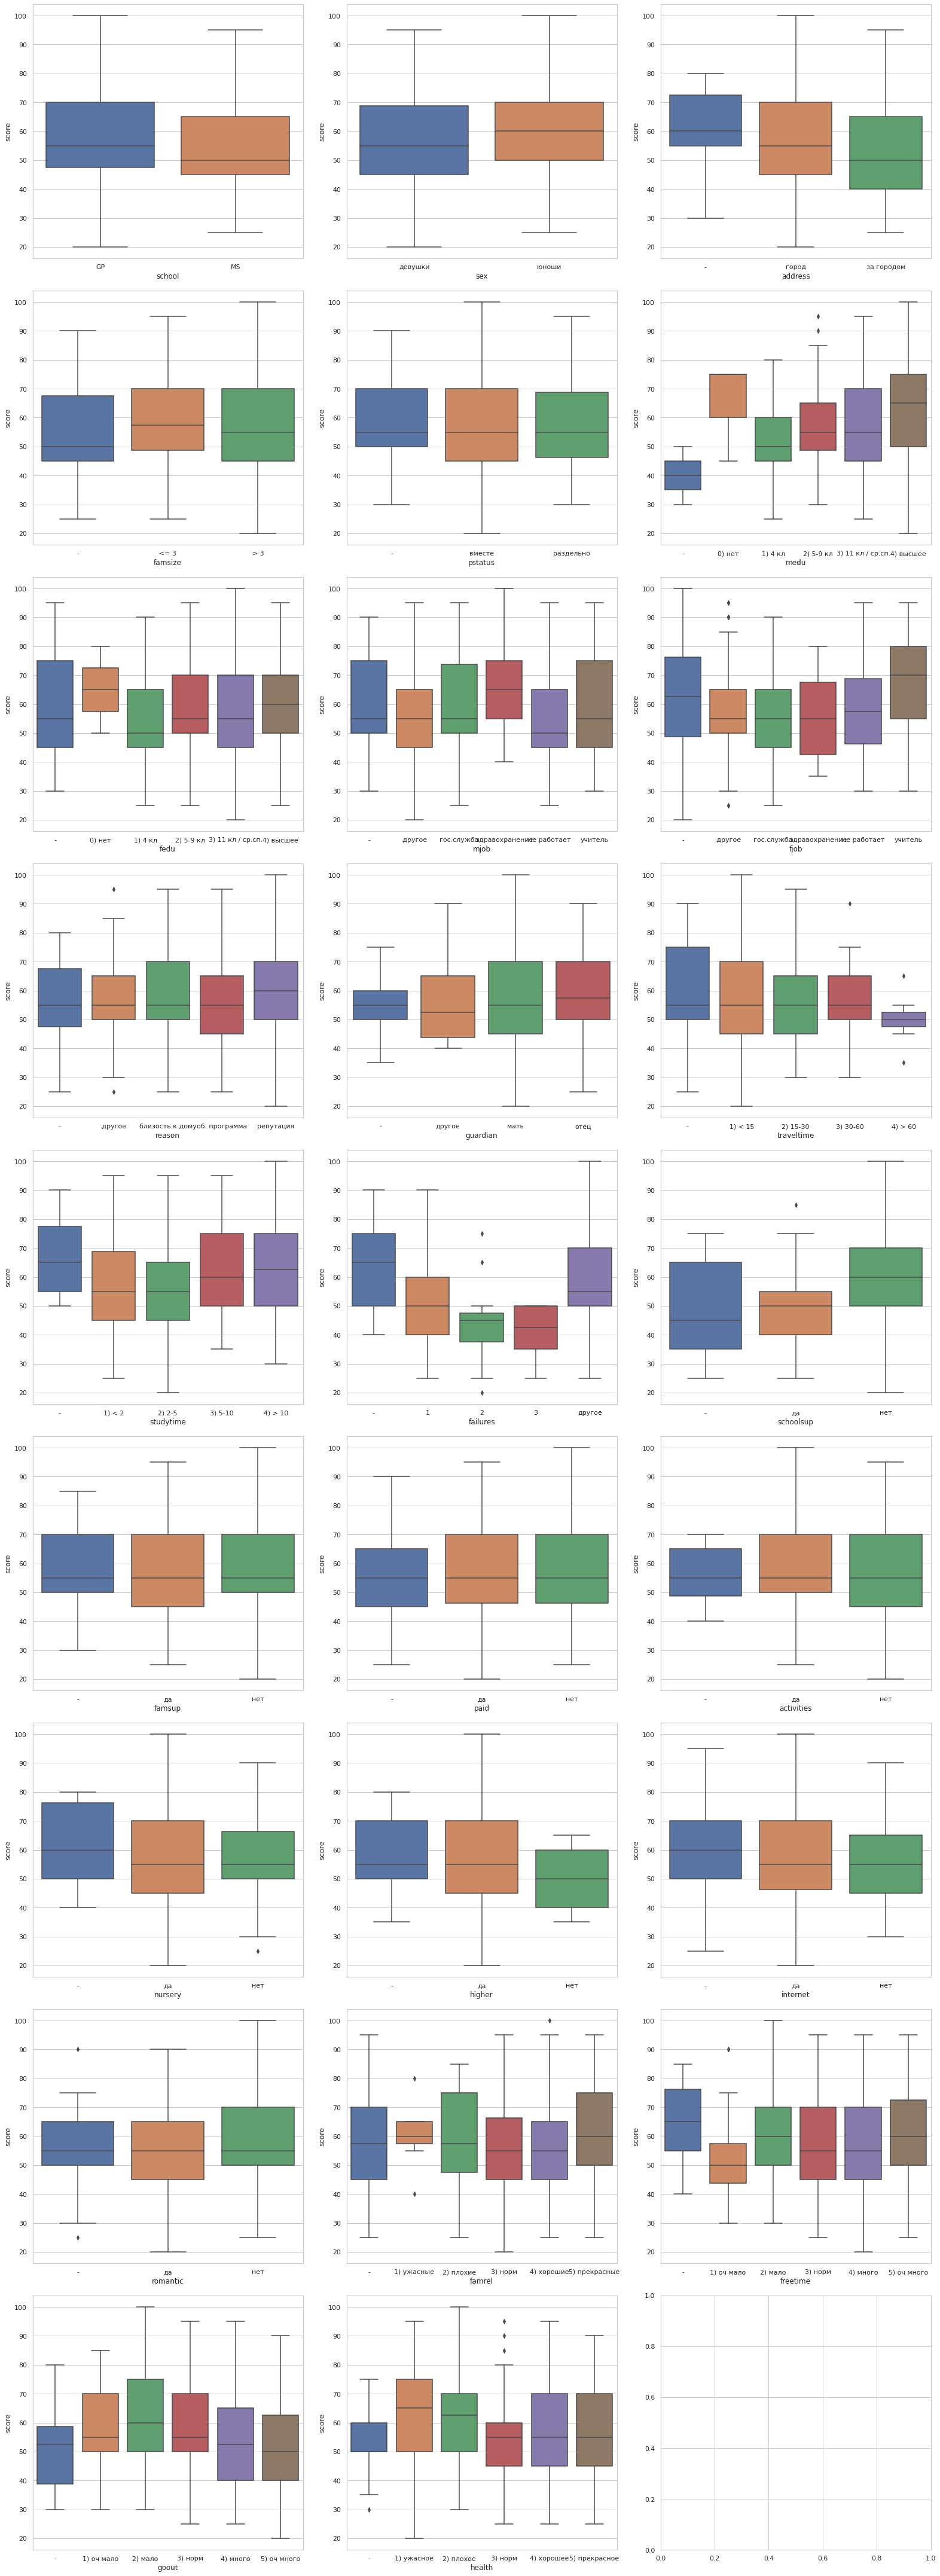

In [19]:
def countplots(df):
  fig, axes = plt.subplots(9, 3, figsize = (22, 60))

  count = 0

  for column_name in df:
    if df[column_name].dtype == 'object':

      ax = axes[count // 3, count % 3]

      df = df.sort_values(by = [column_name])

      sns.boxplot(data = df, x = column_name, y = "score", ax = ax)

      count += 1

  fig.tight_layout() 
  fig.show()


countplots(df)

Глядя на диаграммы можно выделить несколько полей, влияющих на итоговый результат.

* sex
* address
* medu
* mjob
* fjob
* schoolsup
* paid
* higher
* romantic
* studytime
* failures
* goout

Есть несколько интересных моментов.

Оценка сильно зависит от уровня образования матери, чем уровень выше, тем оценка выше. Тем не менее выделяются результаты учеников, у матерей которых нет образования. Интересно почему?

Также интеерсно, почему с образованием отцов такой зависимости нет.

Еще один интересный столбец - количество внеучебных неудач. Чем их меньше, тем результат лучше. Особняком стоит значение 0 (другое), мы не можем знать, что оно означает (меньше 1 или больше 3), следуя общей логике можно предположить, что меньше 1. 



Оставляем в нашем датасете только статистически значимые столбцы.

In [20]:
res = df.loc[:, ['sex', 'address', 'age', 'medu', 'mjob', 'fjob', 'paid', 'higher', 'romantic', 'studytime', 'failures', 'schoolsup', 'goout', 'absences', 'score']]

In [21]:
res

,sex,address,age,medu,mjob,fjob,paid,higher,romantic,studytime,failures,schoolsup,goout,absences,score
216,девушки,город,17,4) высшее,.другое,-,да,да,да,2) 2-5,2,нет,5) оч много,20.0,20.0
18,юноши,город,17,3) 11 кл / ср.сп.,гос.служба,гос.служба,-,да,нет,1) < 2,3,нет,5) оч много,16.0,25.0
248,юноши,за городом,18,3) 11 кл / ср.сп.,.другое,гос.служба,нет,да,да,2) 2-5,1,нет,3) норм,8.0,25.0
384,юноши,за городом,18,4) высшее,.другое,-,-,да,нет,1) < 2,1,нет,3) норм,14.0,25.0
72,девушки,за городом,15,1) 4 кл,.другое,.другое,нет,да,да,2) 2-5,2,да,4) много,2.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,девушки,за городом,18,4) высшее,.другое,-,нет,да,нет,3) 5-10,другое,нет,4) много,0.0,95.0
8,юноши,город,15,3) 11 кл / ср.сп.,гос.служба,.другое,да,да,нет,2) 2-5,другое,нет,2) мало,0.0,95.0
286,девушки,город,18,2) 5-9 кл,не работает,не работает,да,да,нет,3) 5-10,другое,нет,3) норм,5.0,95.0
110,юноши,город,15,4) высшее,учитель,учитель,нет,да,нет,1) < 2,другое,нет,3) норм,6.0,95.0


# Выводы

* Исходные данные частично не полные, присутствуют пустые значения
* В числовых столбцах есть выбросы но реальных числовых столбцов мало, большинство числовых столбцов по сути номинативные.
* Есть непонятные, скорее всего ошибочные занчения.
* Уровень загрязненности данных определить не удается в связи с отсутствием опыта работы с другими данными, интуитивно кажется, что данные достаточно полные и достаточно чистые.
* В целом влияние большинства параметров на оценку достаточно логично, хотя есть некоторые непонятные моменты.
* Параметры, которые предлагается использовать в дальнейшем для построения модели: sex, address, age, medu, mjob, fjob, paid, higher, romantic, studytime, failures, schoolsup, goout, absences
